# Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import quandl
quandl.ApiConfig.api_key = "ybsysG4Eemy9AWq9_Kfc"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [4]:
h0 = pd.read_stata("H0_cpy_all.dta")

In [5]:
comnames = pd.read_excel("UN Comtrade Commodity Classifications.xlsx") # from http://unstats.un.org/unsd/tradekb/Attachment439.aspx?AttachmentType=1
comnames = comnames[(comnames.Classification == 'H5')]

In [6]:
ucom_codes = pd.read_csv('UCOM-datasets-codes.csv') # https://www.quandl.com/data/UCOM-United-Nations-Commodity-Trade/usage/export

# Identifying the most effective export products of a country with high opportunity value

In [7]:
comtoexp = h0[(h0.year == 2016)].drop(columns=['year', 'population']).copy()

In [8]:
comtoexp[
    (comtoexp.exporter == 'IDN')
    & (comtoexp.oppgain != 0)].sort_values(by='rca', ascending=False).head(30).sort_values(by='oppgain', ascending=False)

,exporter,commoditycode,inatlas,export_value,rca,rpop,mcp,eci,pci,oppval,oppgain,distance,import_value
6015696,IDN,3906,1,1.203777e+08,0.874630,0.281450,0,-0.306436,3.549678,2.017173,1.375214,0.858848,1.685783e+08
6016107,IDN,7320,1,6.158685e+07,0.965894,0.310818,0,-0.306436,2.760722,2.017173,1.110544,0.833846,6.319412e+07
6015690,IDN,3823,1,4.206575e+08,0.917116,0.295121,0,-0.306436,2.269975,2.017173,1.029126,0.837574,3.757021e+08
6016307,IDN,8507,1,3.511796e+08,0.863309,0.277807,0,-0.306436,2.098567,2.017173,0.913961,0.794814,2.750838e+08
6016387,IDN,9001,1,2.363316e+08,0.946537,0.304589,0,-0.306436,2.205543,2.017173,0.874201,0.810426,9.607457e+07
6016091,IDN,7304,1,1.795441e+08,0.847914,0.272853,0,-0.306436,1.851715,2.017173,0.866979,0.831914,2.874269e+08
6016004,IDN,6813,1,1.536922e+07,0.989428,0.318391,0,-0.306436,1.254636,2.017173,0.854599,0.829606,3.388543e+07
6016207,IDN,8303,1,1.066536e+07,0.850828,0.273790,0,-0.306436,2.132031,2.017173,0.804965,0.810935,1.078461e+07
6015675,IDN,3808,1,2.776491e+08,0.851393,0.273972,0,-0.306436,1.794060,2.017173,0.794174,0.833848,4.170464e+08
6016233,IDN,8418,1,4.095482e+08,0.949633,0.305585,0,-0.306436,1.915654,2.017173,0.756746,0.803733,3.241991e+08


In [9]:
comnames[comnames.Code == str(3906)] # Identifying the product with the highest opportunity value

,Classification,Code,Description,Code Parent,Level,isLeaf
34828,H5,3906,Acrylic polymers in primary forms,39,4,0


In [10]:
comnames[comnames.Code == str(39)] # Identifying the product group into which it belongs

,Classification,Code,Description,Code Parent,Level,isLeaf
34792,H5,39,Plastics and articles thereof,TOTAL,2,0


# Acquiring trading data for that product type

In [11]:
plas_dat = pd.read_csv('plas_dat.csv') # I complied this data from the UN Comtrade API.
plas_dat.drop(columns='Date', inplace=True)
# Because it takes a while to download it, I wrote out the table into a file.
# Below you can find the steps I made.

# Rendering the plot

We focus only on the simple import values

In [12]:
imp_cols = (plas_dat.columns.str[-20:] == 'Import - Trade (USD)') & (plas_dat.columns.str[-23:] != 'Re-Import - Trade (USD)')
imp_dat = plas_dat.loc[:,imp_cols].dropna(how='all')
imp_dat.head()

,Acrylic polymers nes; in primary forms - Import - Trade (USD),Acrylonitrile-butadiene-styrene (ABS) copolymers - Import - Trade (USD),Alginic acid; its salts & esters; in primary forms - Import - Trade (USD),Alkyd resins; in primary forms - Import - Trade (USD),Amino-resins nes; in primary forms - Import - Trade (USD),Bathroom wares nes; of plastics - Import - Trade (USD),Baths; shower-baths and wash basins; of plastics - Import - Trade (USD),Boxes; cases; crates etc. of plastic - Import - Trade (USD),Carboxymethylcellulose; salts; in primary forms - Import - Trade (USD),Cellulose acetates; non-plasticised; in primary forms - Import - Trade (USD),...,Silicones in primary forms - Import - Trade (USD),Styrene-acrylonitrile (SAN) copolymers; primary forms - Import - Trade (USD),Tube; pipe or hose; rigid; of polyethylene - Import - Trade (USD),Tube; pipe or hose; rigid; of polypropylene - Import - Trade (USD),Tube; pipe or hose; rigid; of polyvinyl chloride - Import - Trade (USD),Urea resins; thiourea resins; in primary forms - Import - Trade (USD),Vinyl chloride copolymers nes in primary forms - Import - Trade (USD),Vinyl chloride-vinyl acetate copolymers; primary form - Import - Trade (USD),Vinyl polymers; halogenated olefins; primary form; ne - Import - Trade (USD),Vinylidene chloride polymers in primary forms - Import - Trade (USD)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75874557.0,9929185.0,3087589.0,11234050.0,15904042.0,8997130.0,6433072.0,7858921.0,6851113.0,20686770.0,...,8635769.0,583064.0,15425077.0,6057782.0,6265034.0,8793888.0,431285.0,653549.0,3825344.0,37692.0
2,1482.0,NaN,NaN,245011.0,NaN,36382.0,108210.0,122637.0,NaN,271.0,...,6613.0,NaN,112768.0,32904.0,64723.0,183.0,283.0,NaN,NaN,NaN
3,111884626.0,14139630.0,2131778.0,302686.0,22266725.0,827146.0,4219622.0,17781391.0,8338867.0,45667.0,...,26772557.0,3856809.0,3990155.0,1337204.0,2570083.0,661240.0,931732.0,877328.0,17135550.0,4024234.0
4,8046155.0,NaN,NaN,539473.0,583635.0,2524783.0,627635.0,2854302.0,57589.0,NaN,...,625628.0,NaN,5679696.0,921824.0,625835.0,96778.0,NaN,NaN,42138.0,NaN


From among them we pick the top decile of the products based on their total import values

In [13]:
top_imp = imp_dat.sum().sort_values(ascending=False)
top_imp.head()

Plastic articles nes - Import - Trade (USD)                                     3.867892e+10
Polyethylene - specific gravity >0.94 in primary form - Import - Trade (USD)    2.042793e+10
Polyethylene - specific gravity <0.94 in primary form - Import - Trade (USD)    1.913963e+10
Polypropylene in primary forms - Import - Trade (USD)                           1.694545e+10
Polymers of ethylene nes; in primary forms - Import - Trade (USD)               1.153100e+10
dtype: float64

In [14]:
top_imp = top_imp[top_imp >= top_imp.quantile(q=0.90)].index

In [32]:
impcors = imp_dat.loc[:,imp_dat.columns.isin(top_imp)]
impcors.columns = impcors.columns.str[:-23]
impcors = impcors.corr()
impcors.head()

,Acrylic polymers nes; in primary forms,Boxes; cases; crates etc. of plastic,Plastic articles nes,Plastic sheet; film; foil or strip; nes,Polycarbonates; in primary forms,Polyethers nes; in primary forms,Polyethylene - specific gravity <0.94 in primary form,Polyethylene - specific gravity >0.94 in primary form,Polymers of ethylene nes; in primary forms,Polypropylene in primary forms,Propylene copolymers in primary forms,Self-adhesive plates; sheets; film; plastic; w >20 cm,Sheet/film not cellular/reinf polymers of ethylene
Acrylic polymers nes; in primary forms,1.000000,0.717739,0.812479,0.829129,0.814361,0.958420,0.926397,0.889807,0.868856,0.865068,0.955422,0.927956,0.927522
Boxes; cases; crates etc. of plastic,0.717739,1.000000,0.915061,0.874761,0.449538,0.740036,0.634352,0.480341,0.464179,0.510091,0.653605,0.658903,0.836024
Plastic articles nes,0.812479,0.915061,1.000000,0.913988,0.555987,0.850811,0.752014,0.603441,0.572945,0.630821,0.789501,0.746081,0.926510
Plastic sheet; film; foil or strip; nes,0.829129,0.874761,0.913988,1.000000,0.439051,0.837084,0.766656,0.537366,0.498706,0.573321,0.747139,0.683857,0.914683
Polycarbonates; in primary forms,0.814361,0.449538,0.555987,0.439051,1.000000,0.746722,0.748871,0.961088,0.964248,0.870628,0.846653,0.948980,0.663547


## Plot2

The graph shows the correlations from different countries between overal imports within a significatn product group.

For this, first we identified those products which
1. belong to the top 30 effective export products of the country (we continued to work with Indonesia),
2. had the highest opporunity gain value from among them,

After that, we accessed the UN Comtrade data API through Quandl and downloaded all trade data related to that wider product group (in this case Plastics). Based on this, we calculated correlations between the the top 10% of imported products based on their import value.

The workflow and graph can help those who are interested in producing a particular product type with significant opporunity gain. For them it shows those products from the same product group, which are also imported into the same countries as the original and shows their close relationship with other products based on their main import destinations. This allows users to shift their production line gainfully while still staying at the same geogprhically market. This graph and data can also provide a good picture of the country in terms of its opportunity- and production-related co-optations and the possible efficiency gaps in terms of its international economic relations.

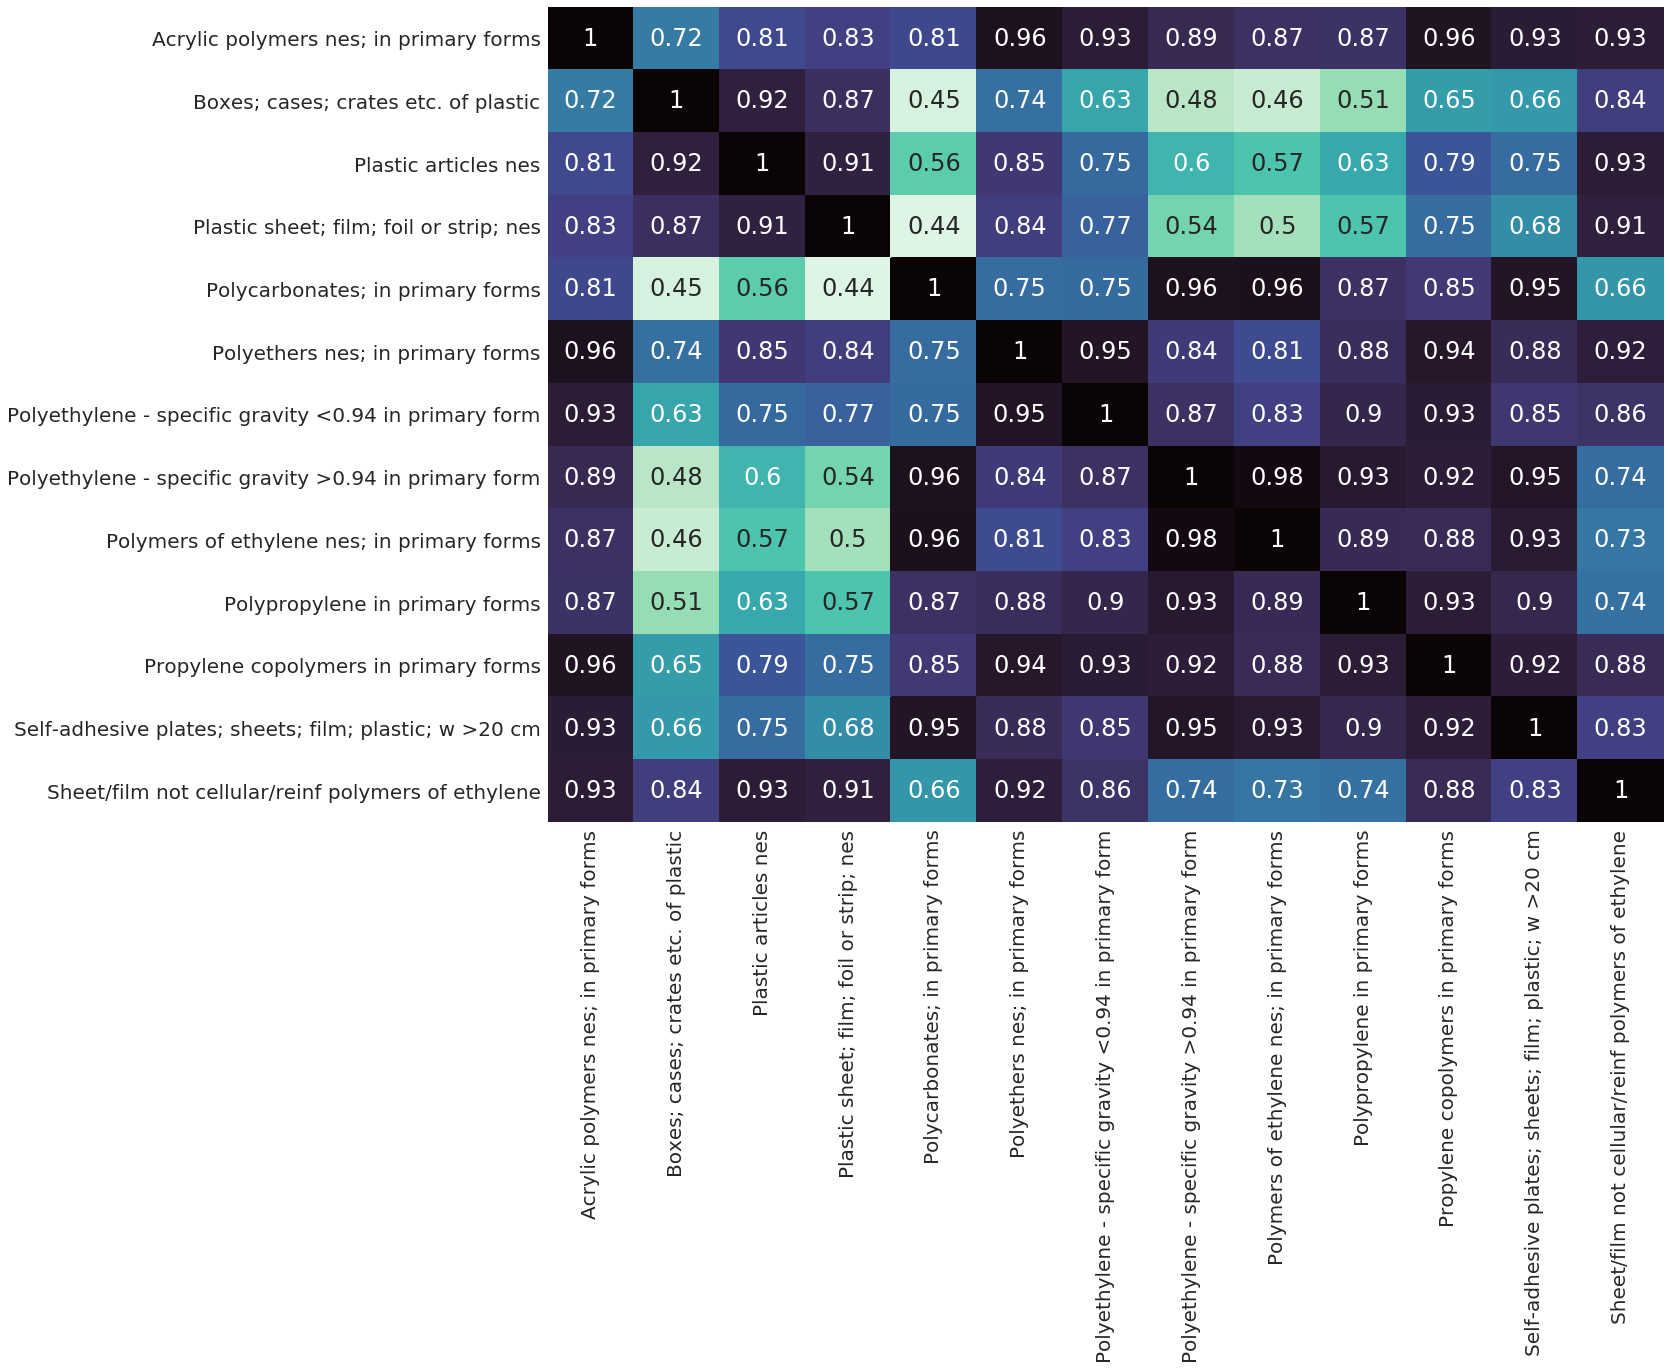

In [48]:
sns.set(font_scale=2)
plt.figure(figsize=(20,15))
sns.heatmap(impcors, xticklabels=True, yticklabels=True, cmap='mako_r', annot=True, cbar=False)